<a href="https://colab.research.google.com/github/swarubm/OWN-PROJECTS/blob/main/karnataka%20tourist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
# Step 1: Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans



In [17]:

# Step 2: Load Dataset
df = pd.read_csv("KARNATAKATOURISTFOOTFALLS2017.csv")



In [25]:
df.shape

(30, 5)

In [18]:
# Step 3: View First 5 Rows
df.head()


,Sl No.,District,Domestic,Foreigner,Total
0,1.0,Bengaluru Urban,8306966,107283,8414249
1,2.0,Bengaluru Rural,1199895,460,1200355
2,3.0,Chitradurga,2102194,1208,2103402
3,4.0,Davangere,3136934,49,3136983
4,5.0,Kolar,2809433,5,2809438


In [19]:
df.tail()

,Sl No.,District,Domestic,Foreigner,Total
28,29.0,Dakshina Kannada,14275697,3544,14279241
29,30.0,Udupi,6393815,736,6394551
30,NaN,Total Tourist Arrivals,179980191,498148,180478339
31,NaN,Growth Rate,38.70%,7.90%,38.60%
32,NaN,All India Rank,3,11,NaN


In [22]:
df = df.iloc[:-3, :]


In [23]:
df.tail()

,Sl No.,District,Domestic,Foreigner,Total
25,26.0,Chamarajanagar,4418308,2151,4420459
26,27.0,Chikkamagaluru,8049258,1673,8050931
27,28.0,Kodagu,1711490,7986,1719476
28,29.0,Dakshina Kannada,14275697,3544,14279241
29,30.0,Udupi,6393815,736,6394551


In [26]:

# Step 4: Basic Info
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Sl No.     30 non-null     float64
 1   District   30 non-null     object 
 2   Domestic   30 non-null     object 
 3   Foreigner  30 non-null     object 
 4   Total      30 non-null     object 
dtypes: float64(1), object(4)
memory usage: 1.3+ KB
None


In [27]:
# Step 5: Check Missing Values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Sl No.       0
District     0
Domestic     0
Foreigner    0
Total        0
dtype: int64


In [30]:
# Assuming columns like: 'District', 'Domestic', 'Foreigner', 'Total'
df['Total'] = df['Domestic'] + df['Foreigner']

# Sort by Total visitors
top_districts = df.sort_values(by='Total', ascending=False).head(5)
print("\nTop 10 Districts with Most Visitors:")
print(top_districts[['District', 'Domestic', 'Foreigner', 'Total']])



Top 10 Districts with Most Visitors:
           District  Domestic Foreigner          Total
0   Bengaluru Urban   8306966    107283  8306966107283
13           Haveri     81500         0         815000
26   Chikkamagaluru   8049258      1673    80492581673
17            Bidar    769607      1016     7696071016
6            Tumkur  65128628         0      651286280


/tmp/ipython-input-4050544622.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total'] = df['Domestic'] + df['Foreigner']


In [38]:
df.head()

,Sl No.,District,Domestic,Foreigner,Total,Cluster,Category
0,1.0,Bengaluru Urban,8306966,107283,8414249,1,Top 5
1,2.0,Bengaluru Rural,1199895,460,1200355,0,Others
2,3.0,Chitradurga,2102194,1208,2103402,0,Others
3,4.0,Davangere,3136934,49,3136983,0,Others
4,5.0,Kolar,2809433,5,2809438,0,Others


/tmp/ipython-input-1382592936.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="District", y="Total", data=df_sorted, palette="viridis")


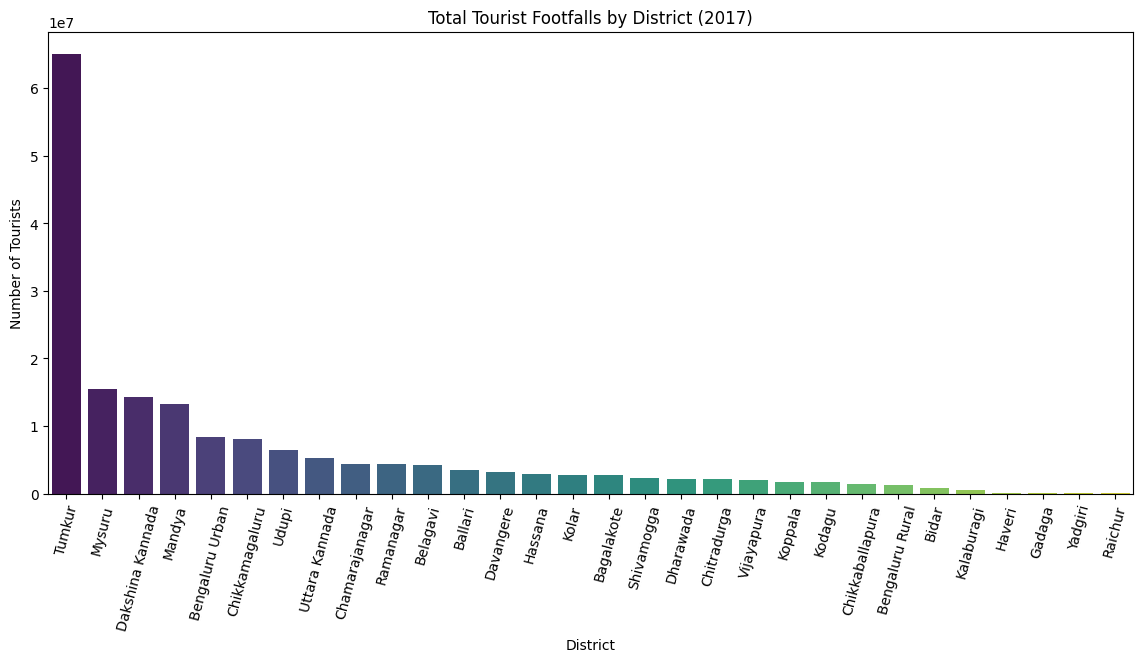

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,6))
df_sorted = df.sort_values("Total", ascending=False)

sns.barplot(x="District", y="Total", data=df_sorted, palette="viridis")
plt.xticks(rotation=75)
plt.title("Total Tourist Footfalls by District (2017)")
plt.ylabel("Number of Tourists")
plt.show()


/tmp/ipython-input-1382592936.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="District", y="Total", data=df_sorted, palette="viridis")


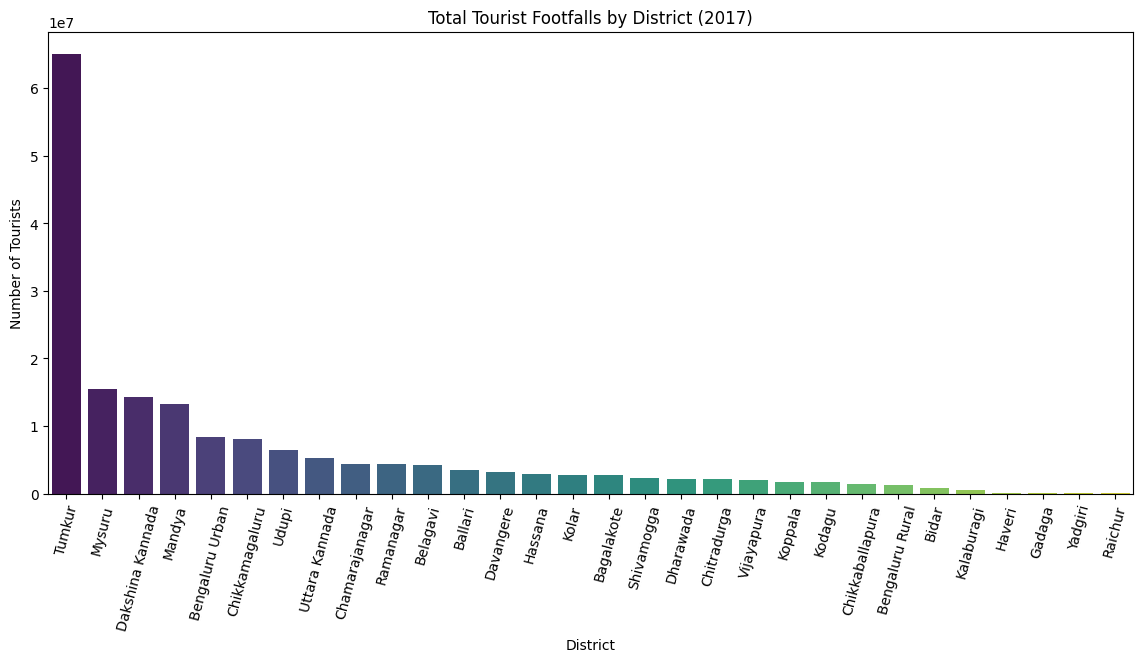

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,6))
df_sorted = df.sort_values("Total", ascending=False)

sns.barplot(x="District", y="Total", data=df_sorted, palette="viridis")
plt.xticks(rotation=75)
plt.title("Total Tourist Footfalls by District (2017)")
plt.ylabel("Number of Tourists")
plt.show()


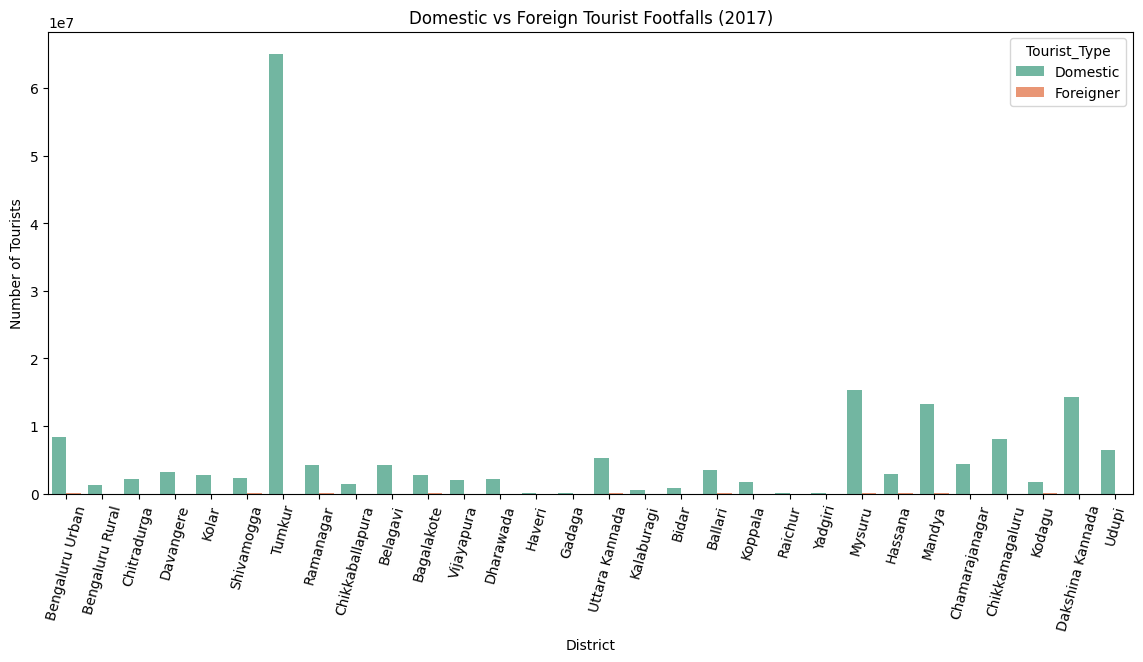

In [45]:
plt.figure(figsize=(14,6))
df_melted = df.melt(id_vars=["District"], value_vars=["Domestic","Foreigner"],
                    var_name="Tourist_Type", value_name="Count")

sns.barplot(x="District", y="Count", hue="Tourist_Type", data=df_melted, palette="Set2")
plt.xticks(rotation=75)
plt.title("Domestic vs Foreign Tourist Footfalls (2017)")
plt.ylabel("Number of Tourists")
plt.show()


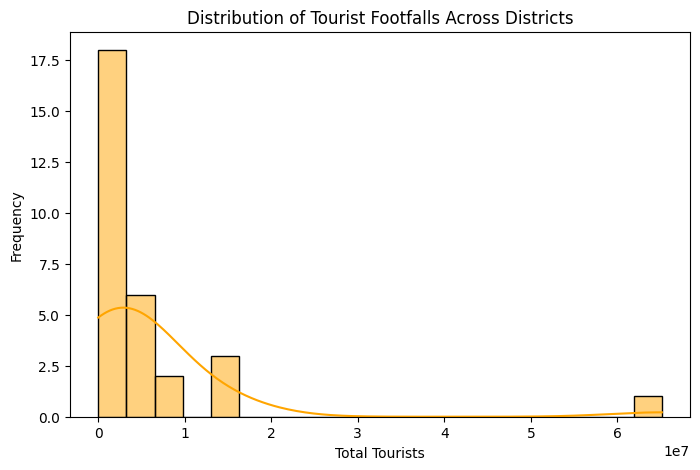

In [46]:
import numpy as np

plt.figure(figsize=(8,5))
sns.histplot(df["Total"], bins=20, kde=True, color="orange")
plt.title("Distribution of Tourist Footfalls Across Districts")
plt.xlabel("Total Tourists")
plt.ylabel("Frequency")
plt.show()


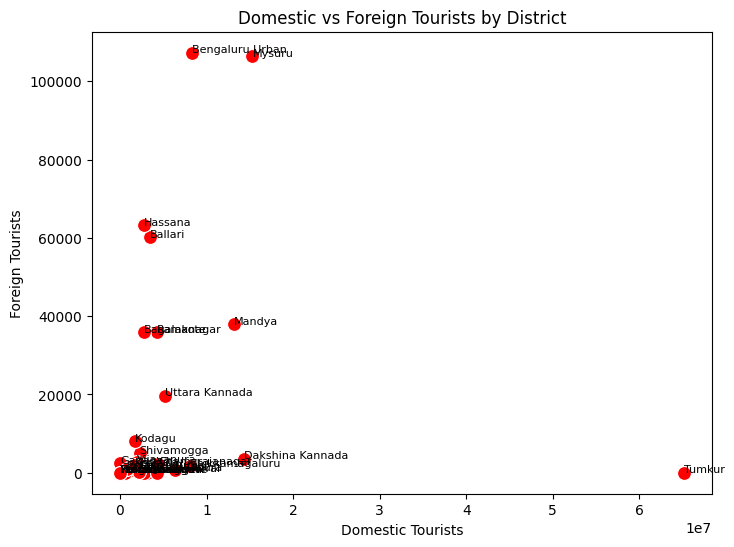

In [47]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="Domestic", y="Foreigner", data=df, s=100, color="red")

for i in range(len(df)):
    plt.text(df["Domestic"].iloc[i], df["Foreigner"].iloc[i], df["District"].iloc[i], fontsize=8)

plt.title("Domestic vs Foreign Tourists by District")
plt.xlabel("Domestic Tourists")
plt.ylabel("Foreign Tourists")
plt.show()
